In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [2]:
df = pd.read_csv('BancoDeDados.csv')
df.head()

,amostra,id_cliente,id_unico_cliente,item_id,cep_cliente,cidade_cliente,estado_cliente,id_pedido,status_pedido,horario_pedido,...,pagamento_sequencial,pagamento_tipo,pagamento_prestacoes,pagamento_valor,review,categoria,categoria_ingles,cep_vendedor,cidade_vendedor,estado_vendedor
0,0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,1,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,...,1,credit_card,2,146.87,4,moveis_escritorio,office_furniture,8577,itaquaquecetuba,SP
1,1,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,1,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,...,1,credit_card,1,275.79,1,moveis_escritorio,office_furniture,8577,itaquaquecetuba,SP
2,2,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,2,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,...,1,credit_card,1,275.79,1,moveis_escritorio,office_furniture,8577,itaquaquecetuba,SP
3,3,f0ac8e5a239118859b1734e1087cbb1f,3c799d181c34d51f6d44bbbc563024db,1,92480,nova santa rita,RS,b1a5d5365d330d10485e0203d54ab9e8,delivered,2017-05-07 20:11:26,...,1,credit_card,7,140.61,3,moveis_escritorio,office_furniture,8577,itaquaquecetuba,SP
4,4,6bc8d08963a135220ed6c6d098831f84,23397e992b09769faf5e66f9e171a241,1,25931,mage,RJ,2e604b3614664aa66867856dba7e61b7,delivered,2018-02-03 19:45:40,...,1,credit_card,10,137.58,4,moveis_escritorio,office_furniture,8577,itaquaquecetuba,SP


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116581 entries, 0 to 116580
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   amostra               116581 non-null  int64  
 1   id_cliente            116581 non-null  object 
 2   id_unico_cliente      116581 non-null  object 
 3   item_id               116581 non-null  int64  
 4   cep_cliente           116581 non-null  int64  
 5   cidade_cliente        116581 non-null  object 
 6   estado_cliente        116581 non-null  object 
 7   id_pedido             116581 non-null  object 
 8   status_pedido         116581 non-null  object 
 9   horario_pedido        116581 non-null  object 
 10  pedido_aprovado       116567 non-null  object 
 11  pedido_entregador     115368 non-null  object 
 12  pedido_entregue       114066 non-null  object 
 13  data_estimada         116581 non-null  object 
 14  id_vendedor           116581 non-null  object 
 15  

# análise exploratória

In [5]:
def plot_perc(st, dados):
    plt.figure(figsize = (20, 8))

    g = sns.countplot(x = st, data = dados, orient = 'h')
    g.set_ylabel('Contagem', fontsize = 14)

    sizes = []

    for p in g.patches:
        height = p.get_height()
        sizes.append(height)
        g.text(p.get_x() + p.get_width()/1.6,
               height + 200,
               '{:1.2f}%'.format(height/116581*100),
               ha = 'center', va = 'bottom', fontsize = 12)
    g.set_ylim(0, max(sizes)* 1.1)

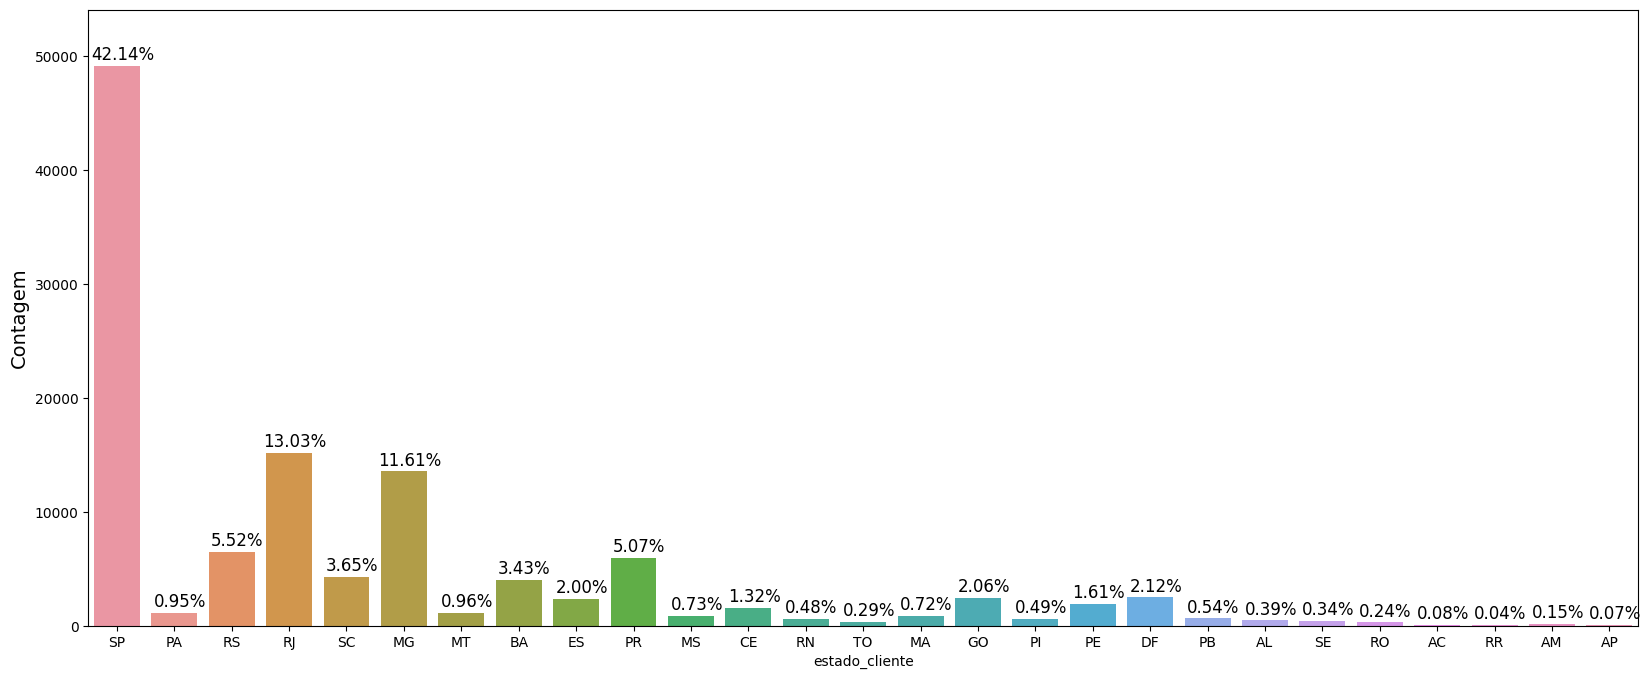

In [6]:
plot_perc('estado_cliente', df)

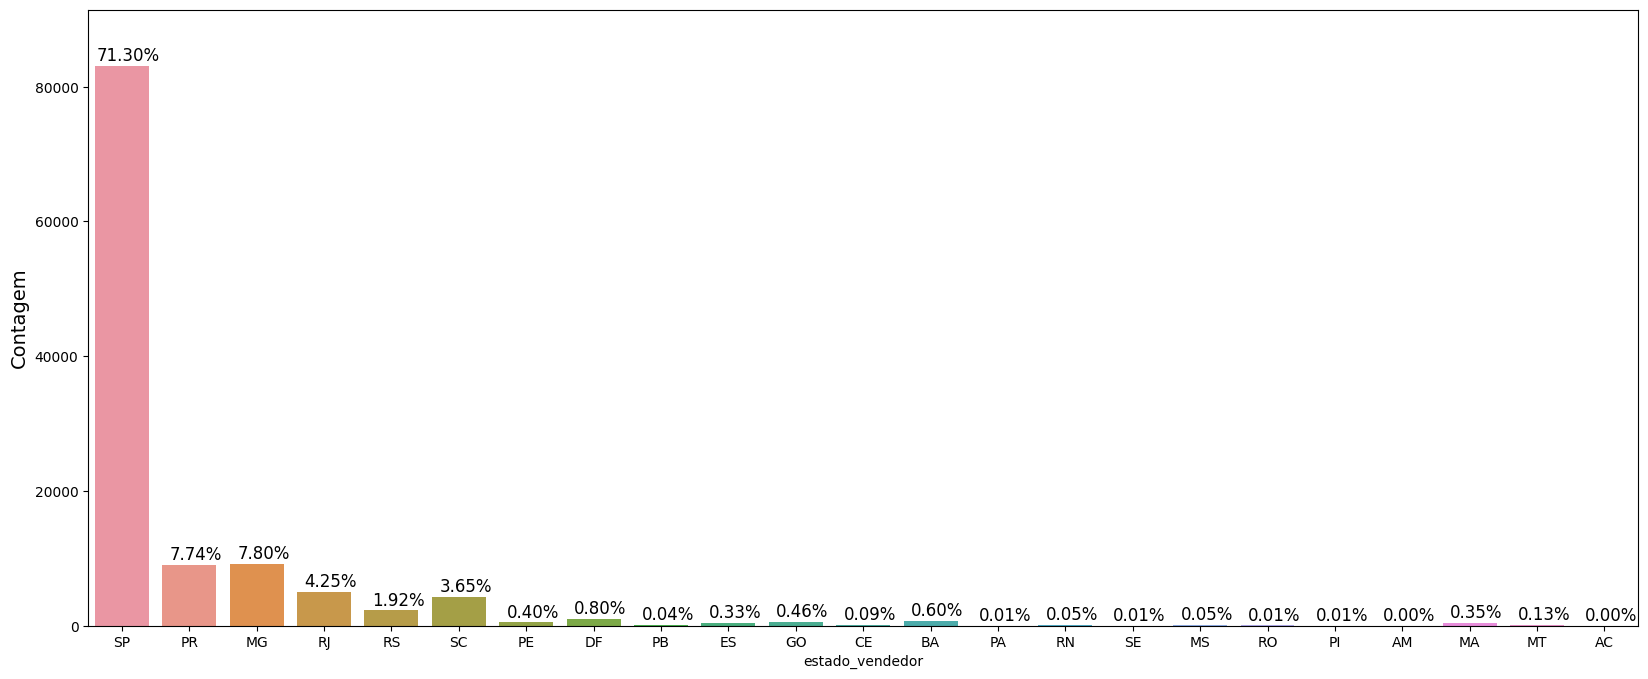

In [7]:
plot_perc('estado_vendedor', df)

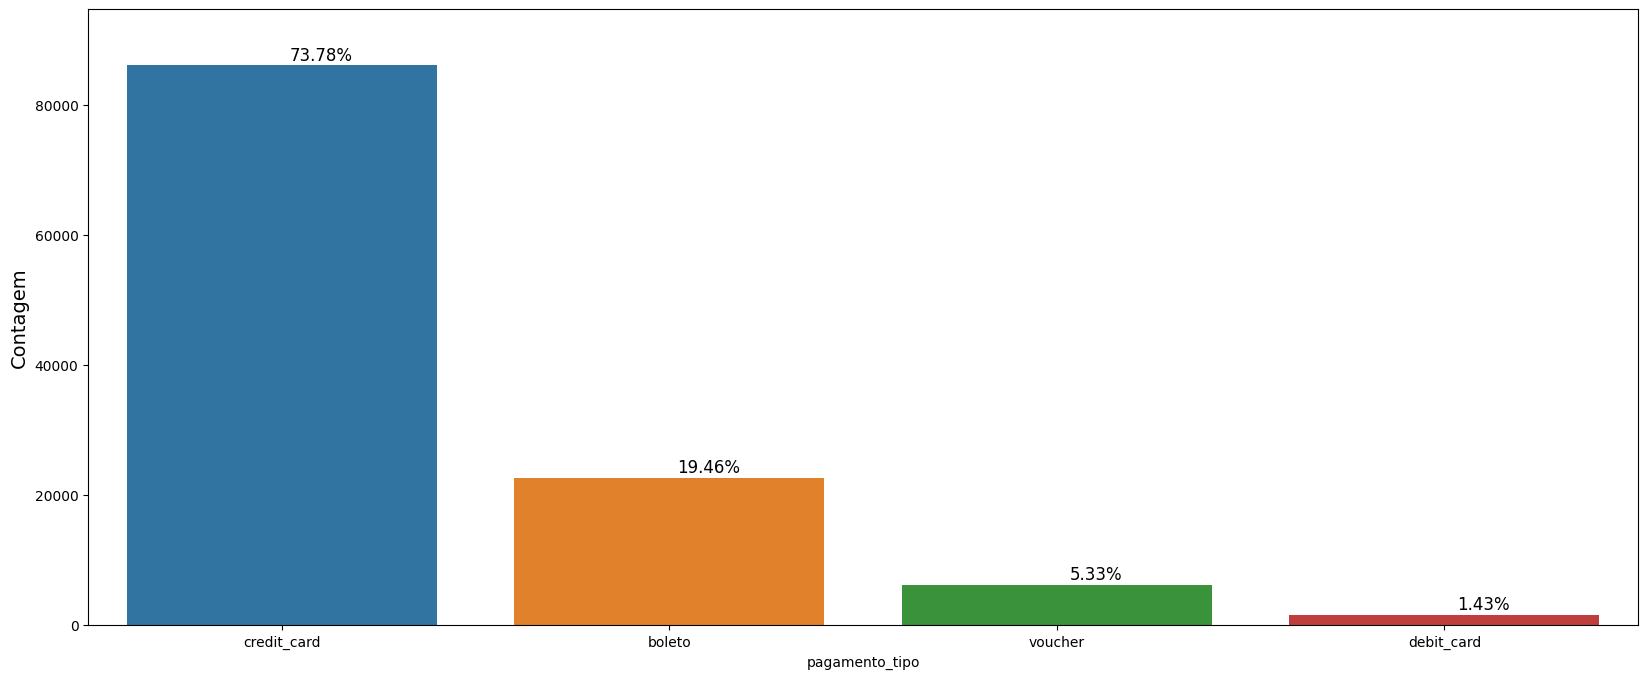

In [8]:
plot_perc('pagamento_tipo', df)

# Modelo RFM (recência, frequencia e receita)

recência - há quantos dias foi a última compra desse cliente? <br>
frequencia - quantas compras esse cliente já fez na empresa desde que se cadastrou?<br>
receita - quanto esse cliente já gastou em dinheiro na empresa?

In [9]:
# pegando apenas as features necessárias para a análise de RFM
df_olist = df[['id_unico_cliente', 'id_cliente', 'horario_pedido', 'item_id', 'preco']]

In [11]:
# agrupar pela data para saber quando cada cliente fez uma compra
df_compra = df.groupby('id_unico_cliente').horario_pedido.max().reset_index()

# renomear as colunas que vou trabalhar
df_compra.columns = ['id_unico_cliente', 'DataMaxCompra']

# transformar o horário em formato válido
df_compra['DataMaxCompra'] = pd.to_datetime(df_compra['DataMaxCompra'])

In [13]:
# selecionar o ponto de observação 
df_compra['Recencia'] = (df_compra['DataMaxCompra'].max() - df_compra['DataMaxCompra']).dt.days

In [14]:
# juntar os datasets

df_usuario = pd.merge(df_olist, df_compra[['id_unico_cliente', 'Recencia']], on = 'id_unico_cliente')
df_usuario.head()

,id_unico_cliente,id_cliente,horario_pedido,item_id,preco,Recencia
0,861eff4711a542e4b93843c6dd7febb0,06b8999e2fba1a1fbc88172c00ba8bc7,2017-05-16 15:05:35,1,124.99,474
1,9eae34bbd3a474ec5d07949ca7de67c0,8912fc0c3bbf1e2fbf35819e21706718,2017-11-09 00:50:13,1,112.99,298
2,9eae34bbd3a474ec5d07949ca7de67c0,8912fc0c3bbf1e2fbf35819e21706718,2017-11-09 00:50:13,2,112.99,298
3,3c799d181c34d51f6d44bbbc563024db,f0ac8e5a239118859b1734e1087cbb1f,2017-05-07 20:11:26,1,124.99,483
4,23397e992b09769faf5e66f9e171a241,6bc8d08963a135220ed6c6d098831f84,2018-02-03 19:45:40,1,106.99,211


In [24]:
from sklearn.cluster import KMeans

def calcular_wcss(data):
    wcss = []
    for k in range(1, 10):
        kmeans = KMeans(n_clusters = k)
        kmeans.fit(X=data)
        data['Clusters'] = kmeans.labels_
        wcss.append(kmeans.inertia_)
    
    return wcss

In [25]:
df_recencia = df_usuario[['Recencia']]
df_recencia.head()

,Recencia
0,474
1,298
2,298
3,483
4,211


In [32]:
import warnings

# Ignorar todos os warnings
warnings.filterwarnings("ignore")

In [33]:
soma_quadrados = calcular_wcss(df_recencia)

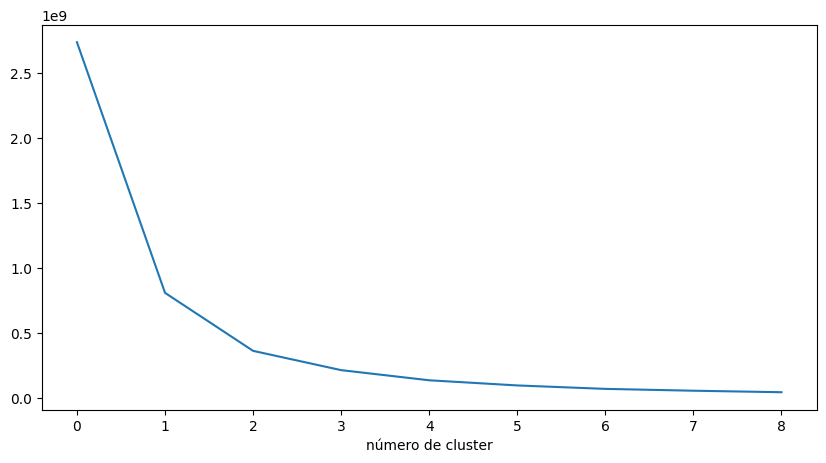

In [34]:
plt.figure(figsize=(10, 5))
plt.plot(soma_quadrados)
plt.xlabel('número de cluster')
plt.show()

In [35]:
import math

def numero_otimo_clusters(wcss):
    x1, y1 = 2, wcss[0]
    x2, y2 = 20, wcss[len(wcss)-1]

    distancia = []
    for i in range(len(wcss)):
        x0 = i + 2
        y0 = wcss[i]
        numerador = abs((y2 - y1)*x0 - (x2 - x1)*y0 + x2*y1 - y2*x1)
        denominador = math.sqrt((y2 - y1)**2 + (x2 - x1)**2)
        distancia.append(numerador/denominador)
    return distancia.index(max(distancia)) + 2

In [36]:
n = numero_otimo_clusters(soma_quadrados)

In [37]:
n

4

In [38]:
kmeans = KMeans(n_clusters = 4)
df_usuario['RecenciaCluster'] = kmeans.fit_predict(df_recencia)
df_usuario.head()

,id_unico_cliente,id_cliente,horario_pedido,item_id,preco,Recencia,RecenciaCluster
0,861eff4711a542e4b93843c6dd7febb0,06b8999e2fba1a1fbc88172c00ba8bc7,2017-05-16 15:05:35,1,124.99,474,2
1,9eae34bbd3a474ec5d07949ca7de67c0,8912fc0c3bbf1e2fbf35819e21706718,2017-11-09 00:50:13,1,112.99,298,1
2,9eae34bbd3a474ec5d07949ca7de67c0,8912fc0c3bbf1e2fbf35819e21706718,2017-11-09 00:50:13,2,112.99,298,1
3,3c799d181c34d51f6d44bbbc563024db,f0ac8e5a239118859b1734e1087cbb1f,2017-05-07 20:11:26,1,124.99,483,2
4,23397e992b09769faf5e66f9e171a241,6bc8d08963a135220ed6c6d098831f84,2018-02-03 19:45:40,1,106.99,211,3


In [40]:
agrupado_por_cluster = df_usuario.groupby('RecenciaCluster')['Recencia'].mean().reset_index()
agrupado_por_cluster.head()

,RecenciaCluster,Recencia
0,0,66.790878
1,1,320.233294
2,2,490.622269
3,3,187.911204


In [46]:
agrupado_por_cluster_ordenado = agrupado_por_cluster.sort_values(by = 'Recencia', ascending=False).reset_index(drop = True)
agrupado_por_cluster_ordenado.head()

,RecenciaCluster,Recencia
0,2,490.622269
1,1,320.233294
2,3,187.911204
3,0,66.790878


In [47]:
agrupado_por_cluster_ordenado['index'] = agrupado_por_cluster_ordenado.index
agrupado_por_cluster_ordenado.head()

,RecenciaCluster,Recencia,index
0,2,490.622269,0
1,1,320.233294,1
2,3,187.911204,2
3,0,66.790878,3


In [48]:
juntando_cluster = pd.merge(df_usuario, agrupado_por_cluster_ordenado[['RecenciaCluster', 'index']], on = 'RecenciaCluster')
juntando_cluster.head()

,id_unico_cliente,id_cliente,horario_pedido,item_id,preco,Recencia,RecenciaCluster,index
0,861eff4711a542e4b93843c6dd7febb0,06b8999e2fba1a1fbc88172c00ba8bc7,2017-05-16 15:05:35,1,124.99,474,2,0
1,3c799d181c34d51f6d44bbbc563024db,f0ac8e5a239118859b1734e1087cbb1f,2017-05-07 20:11:26,1,124.99,483,2,0
2,567ab47ca4deb92d46dbf54dce07d0a7,fd3a0b1bd209f0e7d420c9c3d1127613,2017-03-23 15:10:17,1,126.99,528,2,0
3,f40ab89b622248b7ca125af4b486b887,fbd40c083aa8cddebb5265b2ba6aaf2e,2017-05-16 10:00:49,1,124.99,474,2,0
4,749943913a9851a39c9baf51877fbab6,10558ef4afea173bfb5e2cbe3d5b0bb5,2017-03-18 23:04:36,1,126.99,533,2,0


In [49]:
removendo_dados = juntando_cluster.drop('RecenciaCluster', axis = 1)
removendo_dados.head()

,id_unico_cliente,id_cliente,horario_pedido,item_id,preco,Recencia,index
0,861eff4711a542e4b93843c6dd7febb0,06b8999e2fba1a1fbc88172c00ba8bc7,2017-05-16 15:05:35,1,124.99,474,0
1,3c799d181c34d51f6d44bbbc563024db,f0ac8e5a239118859b1734e1087cbb1f,2017-05-07 20:11:26,1,124.99,483,0
2,567ab47ca4deb92d46dbf54dce07d0a7,fd3a0b1bd209f0e7d420c9c3d1127613,2017-03-23 15:10:17,1,126.99,528,0
3,f40ab89b622248b7ca125af4b486b887,fbd40c083aa8cddebb5265b2ba6aaf2e,2017-05-16 10:00:49,1,124.99,474,0
4,749943913a9851a39c9baf51877fbab6,10558ef4afea173bfb5e2cbe3d5b0bb5,2017-03-18 23:04:36,1,126.99,533,0


In [50]:
df_final = removendo_dados.rename(columns = {'index' : 'RecenciaCluster'})
df_final.head()

,id_unico_cliente,id_cliente,horario_pedido,item_id,preco,Recencia,RecenciaCluster
0,861eff4711a542e4b93843c6dd7febb0,06b8999e2fba1a1fbc88172c00ba8bc7,2017-05-16 15:05:35,1,124.99,474,0
1,3c799d181c34d51f6d44bbbc563024db,f0ac8e5a239118859b1734e1087cbb1f,2017-05-07 20:11:26,1,124.99,483,0
2,567ab47ca4deb92d46dbf54dce07d0a7,fd3a0b1bd209f0e7d420c9c3d1127613,2017-03-23 15:10:17,1,126.99,528,0
3,f40ab89b622248b7ca125af4b486b887,fbd40c083aa8cddebb5265b2ba6aaf2e,2017-05-16 10:00:49,1,124.99,474,0
4,749943913a9851a39c9baf51877fbab6,10558ef4afea173bfb5e2cbe3d5b0bb5,2017-03-18 23:04:36,1,126.99,533,0


In [71]:
def ordenador_cluster(cluster_nome, target_nome, df):
    agrupado_por_cluster = df.groupby(cluster_nome)[target_nome].mean().reset_index()
    agrupado_por_cluster_ordenado = agrupado_por_cluster.sort_values(by = target_nome, ascending=True).reset_index(drop = True)
    agrupado_por_cluster_ordenado['index'] = agrupado_por_cluster_ordenado.index
    juntando_cluster = pd.merge(df, agrupado_por_cluster_ordenado[[cluster_nome, 'index']], on = cluster_nome)
    removendo_dados = juntando_cluster.drop(cluster_nome, axis = 1)
    df_final = removendo_dados.rename(columns = {'index' : cluster_nome})
    return df_final
    

In [52]:
df_usuario = ordenador_cluster('RecenciaCluster', 'Recencia', df_usuario)
df_usuario.head()

,id_unico_cliente,id_cliente,horario_pedido,item_id,preco,Recencia,RecenciaCluster
0,861eff4711a542e4b93843c6dd7febb0,06b8999e2fba1a1fbc88172c00ba8bc7,2017-05-16 15:05:35,1,124.99,474,0
1,3c799d181c34d51f6d44bbbc563024db,f0ac8e5a239118859b1734e1087cbb1f,2017-05-07 20:11:26,1,124.99,483,0
2,567ab47ca4deb92d46dbf54dce07d0a7,fd3a0b1bd209f0e7d420c9c3d1127613,2017-03-23 15:10:17,1,126.99,528,0
3,f40ab89b622248b7ca125af4b486b887,fbd40c083aa8cddebb5265b2ba6aaf2e,2017-05-16 10:00:49,1,124.99,474,0
4,749943913a9851a39c9baf51877fbab6,10558ef4afea173bfb5e2cbe3d5b0bb5,2017-03-18 23:04:36,1,126.99,533,0


In [53]:
df_usuario.groupby('RecenciaCluster')['Recencia'].describe()

,count,mean,std,min,25%,50%,75%,max
RecenciaCluster,,,,,,,,
0,20324.0,490.622269,59.293154,406.0,444.0,481.0,533.0,728.0
1,30828.0,320.233294,43.971639,255.0,281.0,314.0,357.0,405.0
2,33639.0,187.911204,35.134736,128.0,158.0,187.0,218.0,254.0
3,31790.0,66.790878,36.009443,0.0,33.0,67.0,100.0,127.0


In [54]:
df_frequencia = df.groupby('id_unico_cliente').pedido_aprovado.count().reset_index()
df_frequencia.columns = ['id_unico_cliente', 'Frequencia']
df_frequencia.head()

,id_unico_cliente,Frequencia
0,0000366f3b9a7992bf8c76cfdf3221e2,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1
2,0000f46a3911fa3c0805444483337064,1
3,0000f6ccb0745a6a4b88665a16c9f078,1
4,0004aac84e0df4da2b147fca70cf8255,1


In [55]:
df_usuario = pd.merge(df_usuario, df_frequencia, on = 'id_unico_cliente')
df_usuario.head()

,id_unico_cliente,id_cliente,horario_pedido,item_id,preco,Recencia,RecenciaCluster,Frequencia
0,861eff4711a542e4b93843c6dd7febb0,06b8999e2fba1a1fbc88172c00ba8bc7,2017-05-16 15:05:35,1,124.99,474,0,1
1,3c799d181c34d51f6d44bbbc563024db,f0ac8e5a239118859b1734e1087cbb1f,2017-05-07 20:11:26,1,124.99,483,0,1
2,567ab47ca4deb92d46dbf54dce07d0a7,fd3a0b1bd209f0e7d420c9c3d1127613,2017-03-23 15:10:17,1,126.99,528,0,1
3,f40ab89b622248b7ca125af4b486b887,fbd40c083aa8cddebb5265b2ba6aaf2e,2017-05-16 10:00:49,1,124.99,474,0,1
4,749943913a9851a39c9baf51877fbab6,10558ef4afea173bfb5e2cbe3d5b0bb5,2017-03-18 23:04:36,1,126.99,533,0,1


In [56]:
df_frequencia = df_usuario[['Frequencia']]
kmeans = KMeans(n_clusters=4)
df_usuario['FrequenciaCluster'] = kmeans.fit_predict(df_frequencia)
df_usuario.head()

,id_unico_cliente,id_cliente,horario_pedido,item_id,preco,Recencia,RecenciaCluster,Frequencia,FrequenciaCluster
0,861eff4711a542e4b93843c6dd7febb0,06b8999e2fba1a1fbc88172c00ba8bc7,2017-05-16 15:05:35,1,124.99,474,0,1,0
1,3c799d181c34d51f6d44bbbc563024db,f0ac8e5a239118859b1734e1087cbb1f,2017-05-07 20:11:26,1,124.99,483,0,1,0
2,567ab47ca4deb92d46dbf54dce07d0a7,fd3a0b1bd209f0e7d420c9c3d1127613,2017-03-23 15:10:17,1,126.99,528,0,1,0
3,f40ab89b622248b7ca125af4b486b887,fbd40c083aa8cddebb5265b2ba6aaf2e,2017-05-16 10:00:49,1,124.99,474,0,1,0
4,749943913a9851a39c9baf51877fbab6,10558ef4afea173bfb5e2cbe3d5b0bb5,2017-03-18 23:04:36,1,126.99,533,0,1,0


In [57]:
df_usuario.groupby('FrequenciaCluster')['Frequencia'].describe()

,count,mean,std,min,25%,50%,75%,max
FrequenciaCluster,,,,,,,,
0,106570.0,1.306343,0.570539,0.0,1.0,1.0,2.0,3.0
1,731.0,21.489740,6.588977,14.0,15.0,21.0,24.0,38.0
2,75.0,75.000000,0.000000,75.0,75.0,75.0,75.0,75.0
3,9205.0,5.644432,2.138491,4.0,4.0,5.0,6.0,13.0


In [61]:
df_usuario = ordenador_cluster('FrequenciaCluster', 'Frequencia', df_usuario)

In [62]:
df_usuario.groupby('FrequenciaCluster')['Frequencia'].describe()

,count,mean,std,min,25%,50%,75%,max
FrequenciaCluster,,,,,,,,
0,106570.0,1.306343,0.570539,0.0,1.0,1.0,2.0,3.0
1,9205.0,5.644432,2.138491,4.0,4.0,5.0,6.0,13.0
2,731.0,21.489740,6.588977,14.0,15.0,21.0,24.0,38.0
3,75.0,75.000000,0.000000,75.0,75.0,75.0,75.0,75.0


In [64]:
df_receita = df.groupby('id_unico_cliente').pagamento_valor.sum().reset_index()
df_receita.columns = ['id_unico_cliente', 'Receita']
df_usuario = pd.merge(df_usuario, df_receita, on = 'id_unico_cliente')
df_usuario.head()

,id_unico_cliente,id_cliente,horario_pedido,item_id,preco,Recencia,RecenciaCluster,Frequencia,FrequenciaCluster,Receita
0,861eff4711a542e4b93843c6dd7febb0,06b8999e2fba1a1fbc88172c00ba8bc7,2017-05-16 15:05:35,1,124.99,474,0,1,0,146.87
1,3c799d181c34d51f6d44bbbc563024db,f0ac8e5a239118859b1734e1087cbb1f,2017-05-07 20:11:26,1,124.99,483,0,1,0,140.61
2,567ab47ca4deb92d46dbf54dce07d0a7,fd3a0b1bd209f0e7d420c9c3d1127613,2017-03-23 15:10:17,1,126.99,528,0,1,0,142.05
3,f40ab89b622248b7ca125af4b486b887,fbd40c083aa8cddebb5265b2ba6aaf2e,2017-05-16 10:00:49,1,124.99,474,0,1,0,155.70
4,749943913a9851a39c9baf51877fbab6,10558ef4afea173bfb5e2cbe3d5b0bb5,2017-03-18 23:04:36,1,126.99,533,0,1,0,148.33


In [65]:
df_receita = df_usuario[['Receita']]
kmeans = KMeans(n_clusters=4)
df_usuario['ReceitaCluster'] = kmeans.fit_predict(df_receita)
df_usuario.head()

,id_unico_cliente,id_cliente,horario_pedido,item_id,preco,Recencia,RecenciaCluster,Frequencia,FrequenciaCluster,Receita,ReceitaCluster
0,861eff4711a542e4b93843c6dd7febb0,06b8999e2fba1a1fbc88172c00ba8bc7,2017-05-16 15:05:35,1,124.99,474,0,1,0,146.87,0
1,3c799d181c34d51f6d44bbbc563024db,f0ac8e5a239118859b1734e1087cbb1f,2017-05-07 20:11:26,1,124.99,483,0,1,0,140.61,0
2,567ab47ca4deb92d46dbf54dce07d0a7,fd3a0b1bd209f0e7d420c9c3d1127613,2017-03-23 15:10:17,1,126.99,528,0,1,0,142.05,0
3,f40ab89b622248b7ca125af4b486b887,fbd40c083aa8cddebb5265b2ba6aaf2e,2017-05-16 10:00:49,1,124.99,474,0,1,0,155.70,0
4,749943913a9851a39c9baf51877fbab6,10558ef4afea173bfb5e2cbe3d5b0bb5,2017-03-18 23:04:36,1,126.99,533,0,1,0,148.33,0


In [72]:
df_usuario = ordenador_cluster('ReceitaCluster', 'Receita', df_usuario)

In [73]:
df_usuario.groupby('ReceitaCluster')['Receita'].describe()

,count,mean,std,min,25%,50%,75%,max
ReceitaCluster,,,,,,,,
0,114904.0,261.485763,377.283592,9.59,69.90,132.82,270.00,3080.96
1,1478.0,5900.843911,2894.129234,3083.40,3798.75,4875.25,7315.92,16313.60
2,191.0,27358.656911,10032.832924,17069.76,19167.26,25051.89,30186.00,45256.00
3,8.0,109312.640000,0.000000,109312.64,109312.64,109312.64,109312.64,109312.64


In [74]:
df_usuario.head()

,id_unico_cliente,id_cliente,horario_pedido,item_id,preco,Recencia,RecenciaCluster,Frequencia,FrequenciaCluster,Receita,ReceitaCluster
0,861eff4711a542e4b93843c6dd7febb0,06b8999e2fba1a1fbc88172c00ba8bc7,2017-05-16 15:05:35,1,124.99,474,0,1,0,146.87,0
1,3c799d181c34d51f6d44bbbc563024db,f0ac8e5a239118859b1734e1087cbb1f,2017-05-07 20:11:26,1,124.99,483,0,1,0,140.61,0
2,567ab47ca4deb92d46dbf54dce07d0a7,fd3a0b1bd209f0e7d420c9c3d1127613,2017-03-23 15:10:17,1,126.99,528,0,1,0,142.05,0
3,f40ab89b622248b7ca125af4b486b887,fbd40c083aa8cddebb5265b2ba6aaf2e,2017-05-16 10:00:49,1,124.99,474,0,1,0,155.70,0
4,749943913a9851a39c9baf51877fbab6,10558ef4afea173bfb5e2cbe3d5b0bb5,2017-03-18 23:04:36,1,126.99,533,0,1,0,148.33,0


In [75]:
# criando o sistema de pontuação para a clusterização dos clientes

df_final = df_usuario[['id_unico_cliente', 'Recencia', 'RecenciaCluster', 'Frequencia',
                       'FrequenciaCluster', 'Receita', 'ReceitaCluster']]
df_final.tail()

,id_unico_cliente,Recencia,RecenciaCluster,Frequencia,FrequenciaCluster,Receita,ReceitaCluster
116576,0a0a92112bd4c708ca5fde585afaa872,338,1,8,1,109312.64,3
116577,0a0a92112bd4c708ca5fde585afaa872,338,1,8,1,109312.64,3
116578,0a0a92112bd4c708ca5fde585afaa872,338,1,8,1,109312.64,3
116579,0a0a92112bd4c708ca5fde585afaa872,338,1,8,1,109312.64,3
116580,0a0a92112bd4c708ca5fde585afaa872,338,1,8,1,109312.64,3


In [76]:
df_final['Pontuacao'] = df_final['RecenciaCluster'] + df_final['FrequenciaCluster'] + df_final['ReceitaCluster']
df_final.head()

,id_unico_cliente,Recencia,RecenciaCluster,Frequencia,FrequenciaCluster,Receita,ReceitaCluster,Pontuacao
0,861eff4711a542e4b93843c6dd7febb0,474,0,1,0,146.87,0,0
1,3c799d181c34d51f6d44bbbc563024db,483,0,1,0,140.61,0,0
2,567ab47ca4deb92d46dbf54dce07d0a7,528,0,1,0,142.05,0,0
3,f40ab89b622248b7ca125af4b486b887,474,0,1,0,155.70,0,0
4,749943913a9851a39c9baf51877fbab6,533,0,1,0,148.33,0,0


In [77]:
df_final.Pontuacao.max()

7

In [78]:
df_final['Segmento'] = 'Inativo'
df_final.loc[df_final['Pontuacao'] >=1, 'Segmento'] = 'Business'
df_final.loc[df_final['Pontuacao'] >=3, 'Segmento'] = 'Master'
df_final.loc[df_final['Pontuacao'] >=5, 'Segmento'] = 'Premium'

df_final.head()

,id_unico_cliente,Recencia,RecenciaCluster,Frequencia,FrequenciaCluster,Receita,ReceitaCluster,Pontuacao,Segmento
0,861eff4711a542e4b93843c6dd7febb0,474,0,1,0,146.87,0,0,Inativo
1,3c799d181c34d51f6d44bbbc563024db,483,0,1,0,140.61,0,0,Inativo
2,567ab47ca4deb92d46dbf54dce07d0a7,528,0,1,0,142.05,0,0,Inativo
3,f40ab89b622248b7ca125af4b486b887,474,0,1,0,155.70,0,0,Inativo
4,749943913a9851a39c9baf51877fbab6,533,0,1,0,148.33,0,0,Inativo


In [79]:
df_final.tail()

,id_unico_cliente,Recencia,RecenciaCluster,Frequencia,FrequenciaCluster,Receita,ReceitaCluster,Pontuacao,Segmento
116576,0a0a92112bd4c708ca5fde585afaa872,338,1,8,1,109312.64,3,5,Premium
116577,0a0a92112bd4c708ca5fde585afaa872,338,1,8,1,109312.64,3,5,Premium
116578,0a0a92112bd4c708ca5fde585afaa872,338,1,8,1,109312.64,3,5,Premium
116579,0a0a92112bd4c708ca5fde585afaa872,338,1,8,1,109312.64,3,5,Premium
116580,0a0a92112bd4c708ca5fde585afaa872,338,1,8,1,109312.64,3,5,Premium


In [80]:
df_final.to_csv('RFM.csv')

# análise visual

In [81]:
def plot_segmento(x, y, data):
    sns.set(palette = 'muted', color_codes=True, style='whitegrid')
    plt.figure(figsize=(7,5))
    sns.scatterplot(x=x, y=y, hue='Segmento', data = data, 
                    size = 'Segmento', sizes= (50,150), size_order=['Premium', 'Master', 'Business', 'Inativo'])
    plt.show

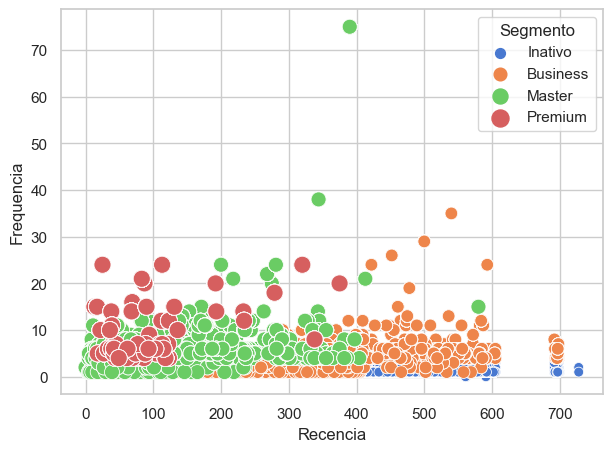

In [82]:
plot_segmento('Recencia', 'Frequencia', df_final)

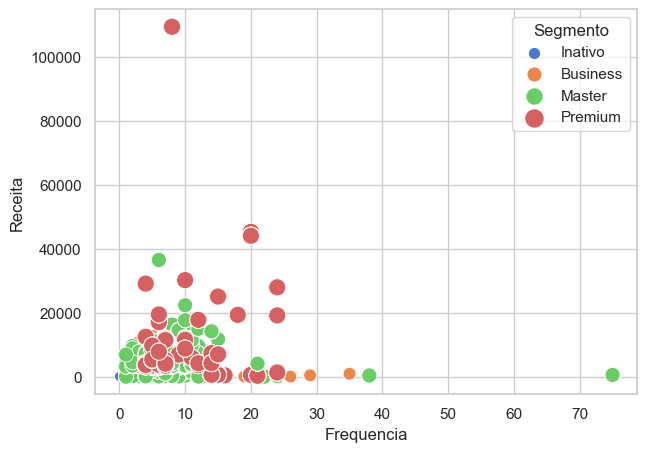

In [83]:
plot_segmento('Frequencia', 'Receita', df_final)

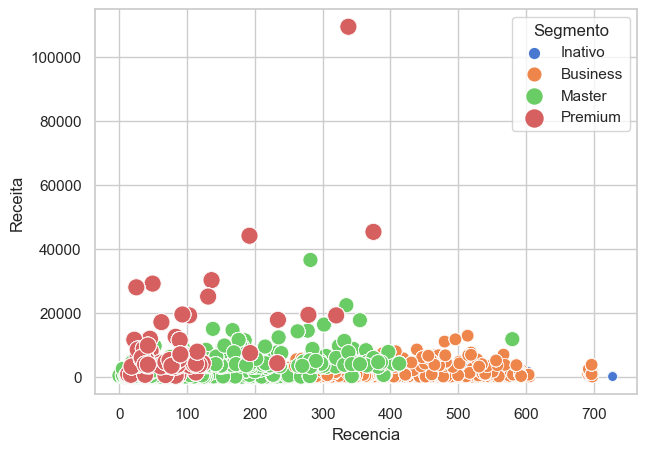

In [84]:
plot_segmento('Recencia', 'Receita', df_final)

<Axes: xlabel='Segmento', ylabel='count'>

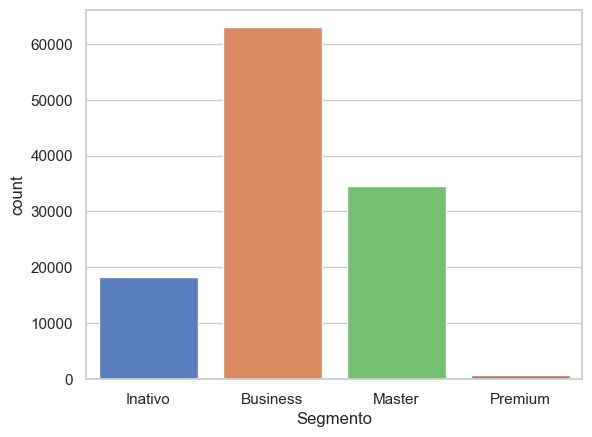

In [89]:
sns.countplot(df_final, x = 'Segmento')